In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
chicago_df = pd.read_csv('Crimes_-_2001_to_Present.csv')
atlanta_df = pd.read_csv('Atlanta 2015-2020.csv', low_memory=False)
la_df = pd.read_csv('crimes.csv')

In [5]:
chicago_df = chicago_df.drop_duplicates()
atlanta_df = atlanta_df.drop_duplicates()
la_df = la_df.drop_duplicates()


In [7]:
print(la_df.columns)

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA NAME',
       'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Weapon Desc',
       'Status Desc', 'LOCATION'],
      dtype='object')


In [7]:
chicago_df['Primary Type'] = chicago_df['Primary Type'].fillna('Unknown')
atlanta_df['offense'] = atlanta_df['offense'].fillna('Unknown')
la_df['Crm Cd Desc'] = la_df['Crm Cd Desc'].fillna('Unknown')

# Drop rows where Location (Latitude/Longitude) is missing
chicago_df = chicago_df.dropna(subset=['Latitude', 'Longitude'])
atlanta_df = atlanta_df.dropna(subset=['Location'])   
la_df = la_df.dropna(subset=['LOCATION'])             


In [9]:
chicago_df.rename(columns={'Primary Type': 'Crime_Type', 'Date': 'Date'}, inplace=True)
atlanta_df.rename(columns={'Report Date': 'Date', 'offense': 'Crime_Type'}, inplace=True)
la_df.rename(columns={'Crm Cd Desc': 'Crime_Type', 'Date Rptd': 'Date'}, inplace=True)


In [11]:
# Add City column
chicago_df['City'] = 'Chicago'
atlanta_df['City'] = 'Atlanta'
la_df['City'] = 'Los Angeles'


In [13]:
# Select only the columns you need
chicago_df_small = chicago_df[['Date', 'Crime_Type', 'City']]
atlanta_df_small = atlanta_df[['Date', 'Crime_Type', 'City']]
la_df_small = la_df[['Date', 'Crime_Type', 'City']]

In [15]:
print(atlanta_df.columns)

Index(['Report Number', 'Date', 'Occur Date', 'Occur Time', 'Possible Date',
       'Possible Time', 'Location', 'Crime_Type', 'Latitude', 'Longitude',
       'City'],
      dtype='object')


In [17]:
combined_df = pd.concat([chicago_df_small, atlanta_df_small, la_df_small], ignore_index=True)

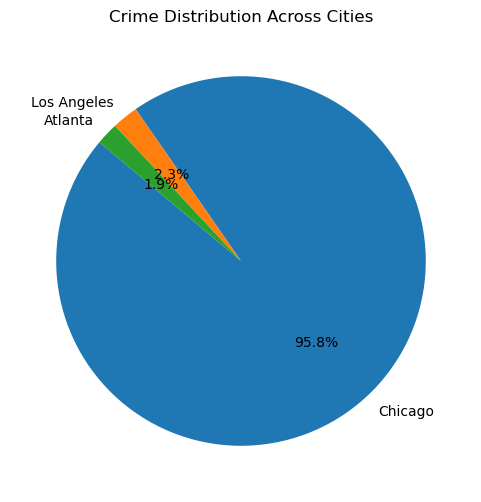

In [19]:
city_counts = combined_df['City'].value_counts()
city_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(6,6))
plt.title('Crime Distribution Across Cities')
plt.ylabel('')
plt.show()
